# Credit Card Fraud Detection Project

Credit card fraud has become a significant concern in today's digital era. With the increasing reliance on online transactions, fraudsters have become more sophisticated, making it crucial to develop robust systems for detecting and preventing fraudulent activities. Credit card fraud can lead to financial losses for both individuals and financial institutions, erode customer trust, and impact overall economic stability.

A credit card fraud detection project aims to identify fraudulent transactions by leveraging machine learning and data analysis techniques. By analyzing historical transaction data, these projects aim to build models that can accurately distinguish between legitimate and fraudulent transactions, allowing for timely intervention and prevention of fraud.

Project Objective: The primary objective of a credit card fraud detection project is to develop an effective system that can identify fraudulent transactions with high accuracy and minimize false positives (legitimate transactions wrongly flagged as fraud). This involves building machine learning models that can learn from historical data and generalize well to detect new and emerging fraud patterns.

### Importing libraries required

In [1]:
# Import the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

### Load the dataset

In [2]:
# Load the csv file

dataframe = pd.read_csv("creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(dataframe.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [172]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   V1                283726 non-null  float64
 1   V2                283726 non-null  float64
 2   V3                283726 non-null  float64
 3   V4                283726 non-null  float64
 4   V5                283726 non-null  float64
 5   V6                283726 non-null  float64
 6   V7                283726 non-null  float64
 7   V8                283726 non-null  float64
 8   V9                283726 non-null  float64
 9   V10               283726 non-null  float64
 10  V11               283726 non-null  float64
 11  V12               283726 non-null  float64
 12  V13               283726 non-null  float64
 13  V14               283726 non-null  float64
 14  V15               283726 non-null  float64
 15  V16               283726 non-null  float64
 16  V17               28

In [173]:
dataframe.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,2.837260e+05
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.001667,-5.409347e-17
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,0.040796,1.000002e+00
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,-3.533268e-01
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,0.000000,-3.309625e-01
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,0.000000,-2.654671e-01
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,0.000000,-4.378088e-02
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000,1.022476e+02


### DATA QUALITY CHECK


#### Check for NULL/MISSING values

In [117]:
round(100 * (dataframe.isnull().sum()/len(dataframe)),2).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [118]:
# percentage of missing values in each row
round(100 * (dataframe.isnull().sum(axis=1)/len(dataframe)),2).sort_values(ascending=False)

0         0.0
189869    0.0
189875    0.0
189874    0.0
189873    0.0
         ... 
94942     0.0
94943     0.0
94944     0.0
94945     0.0
284806    0.0
Length: 284807, dtype: float64

Note:
There are no missing / Null values either in columns or rows

#### Duplicate check

In [183]:
dataframe_d=dataframe.copy()
dataframe_d.drop_duplicates(subset=None, inplace=True)

In [120]:
dataframe.shape

(284807, 31)

In [121]:
dataframe_d.shape

(283726, 31)

Note:
Duplicate are found in the records

In [122]:
#assigning duplicates removed dataset to original dataset
dataframe=dataframe_d
dataframe.shape

(283726, 31)

###  Exploratory Data Analysis

Number of Genuine transactions:  283253
Number of Fraud transactions:  473
Percentage of Genuine transactions: 99.8333
Percentage of Fraud transactions: 0.1667


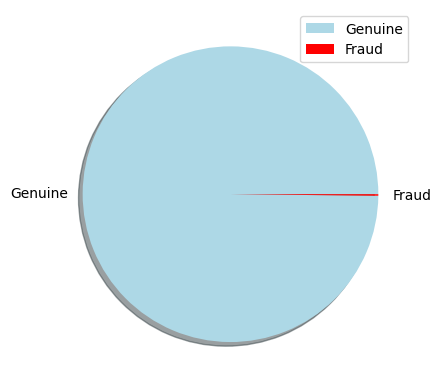

In [123]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
l=[non_fraud,fraud]
labels = ["Genuine", "Fraud"]
my_color=['lightblue','red']

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Genuine transactions: {:.4f}".format(100-fraud_percent))
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))
plt.pie(l,labels=labels,shadow=True,colors=my_color)
plt.legend()
plt.show()

#### Here a pie is plotted to represent the non fraud and genuine transactions.Red ones are fraud blue color represent fraud tranctions

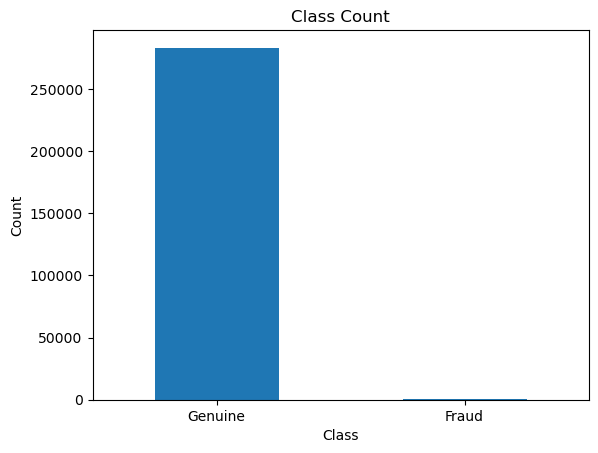

In [124]:
# Visualize the "Labels" column in our dataset

labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Class Count")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

#### The above bar graph describes the count of genuine and fraud transactions

### Transactions amount

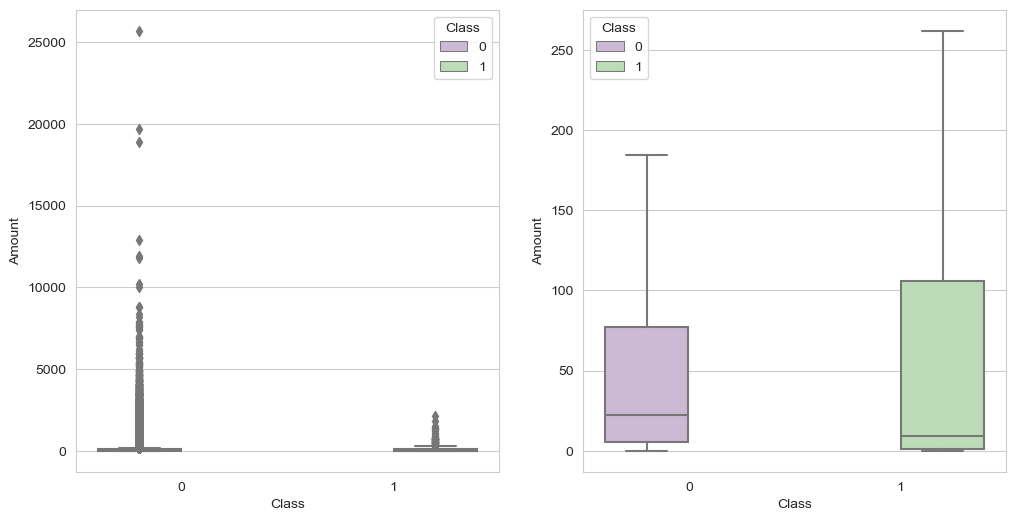

In [176]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=dataframe, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=dataframe, palette="PRGn",showfliers=False)
plt.show();

In [178]:
tmp = dataframe[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [179]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.



## Features density plot

C:\Users\annab\AppData\Local\Temp\ipykernel_24920\2252020631.py:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
C:\Users\annab\AppData\Local\Temp\ipykernel_24920\2252020631.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
C:\Users\annab\AppData\Local\Temp\ipykernel_24920\2252020631.py:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.



C:\Users\annab\AppData\Local\Temp\ipykernel_24920\2252020631.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
C:\Users\annab\AppData\Local\Temp\ipykernel_24920\2252020631.py:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
C:\Users\annab\AppData\Local\Temp\ipykernel_24920\2252020631.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.



C:\Users\annab\AppData\Local\Temp\ipykernel_24920\2252020631.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
C:\Users\annab\AppData\Local\Temp\ipykernel_24920\2252020631.py:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
C:\Users\annab\AppData\Local\Temp\ipykernel_24920\2252020631.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.



<Figure size 640x480 with 0 Axes>

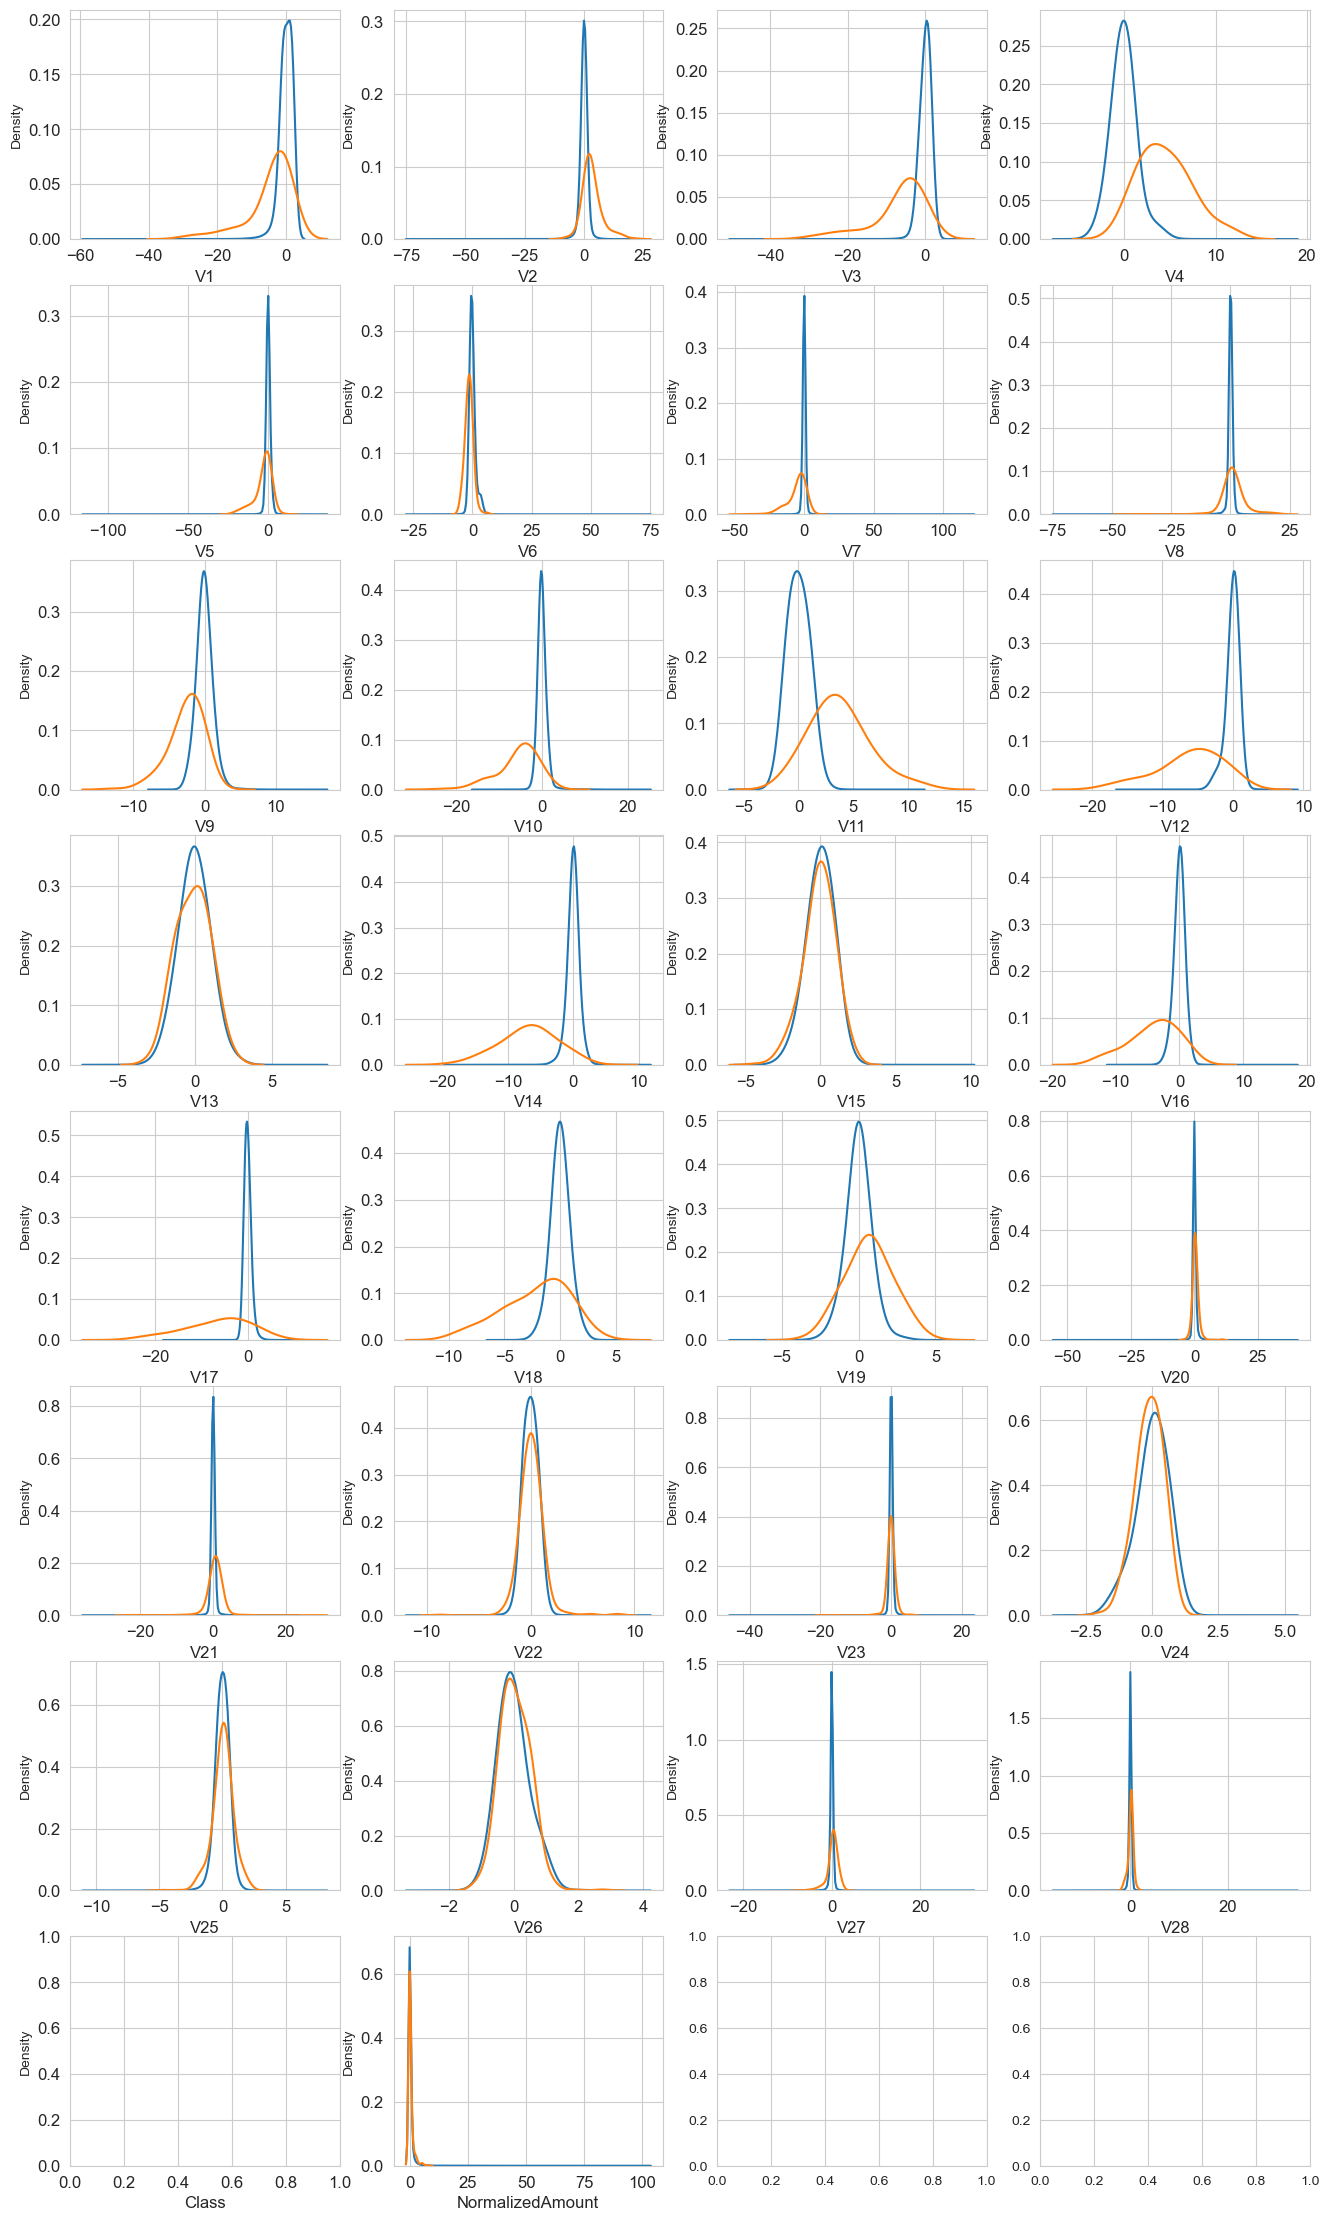

In [168]:
var = dataframe.columns.values

i = 0
t0 = dataframe.loc[dataframe['Class'] == 0]
t1 = dataframe.loc[dataframe['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();


For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

#### There is clearly a lot more variability in the transaction values for non-fraudulent transactions.

<Axes: >

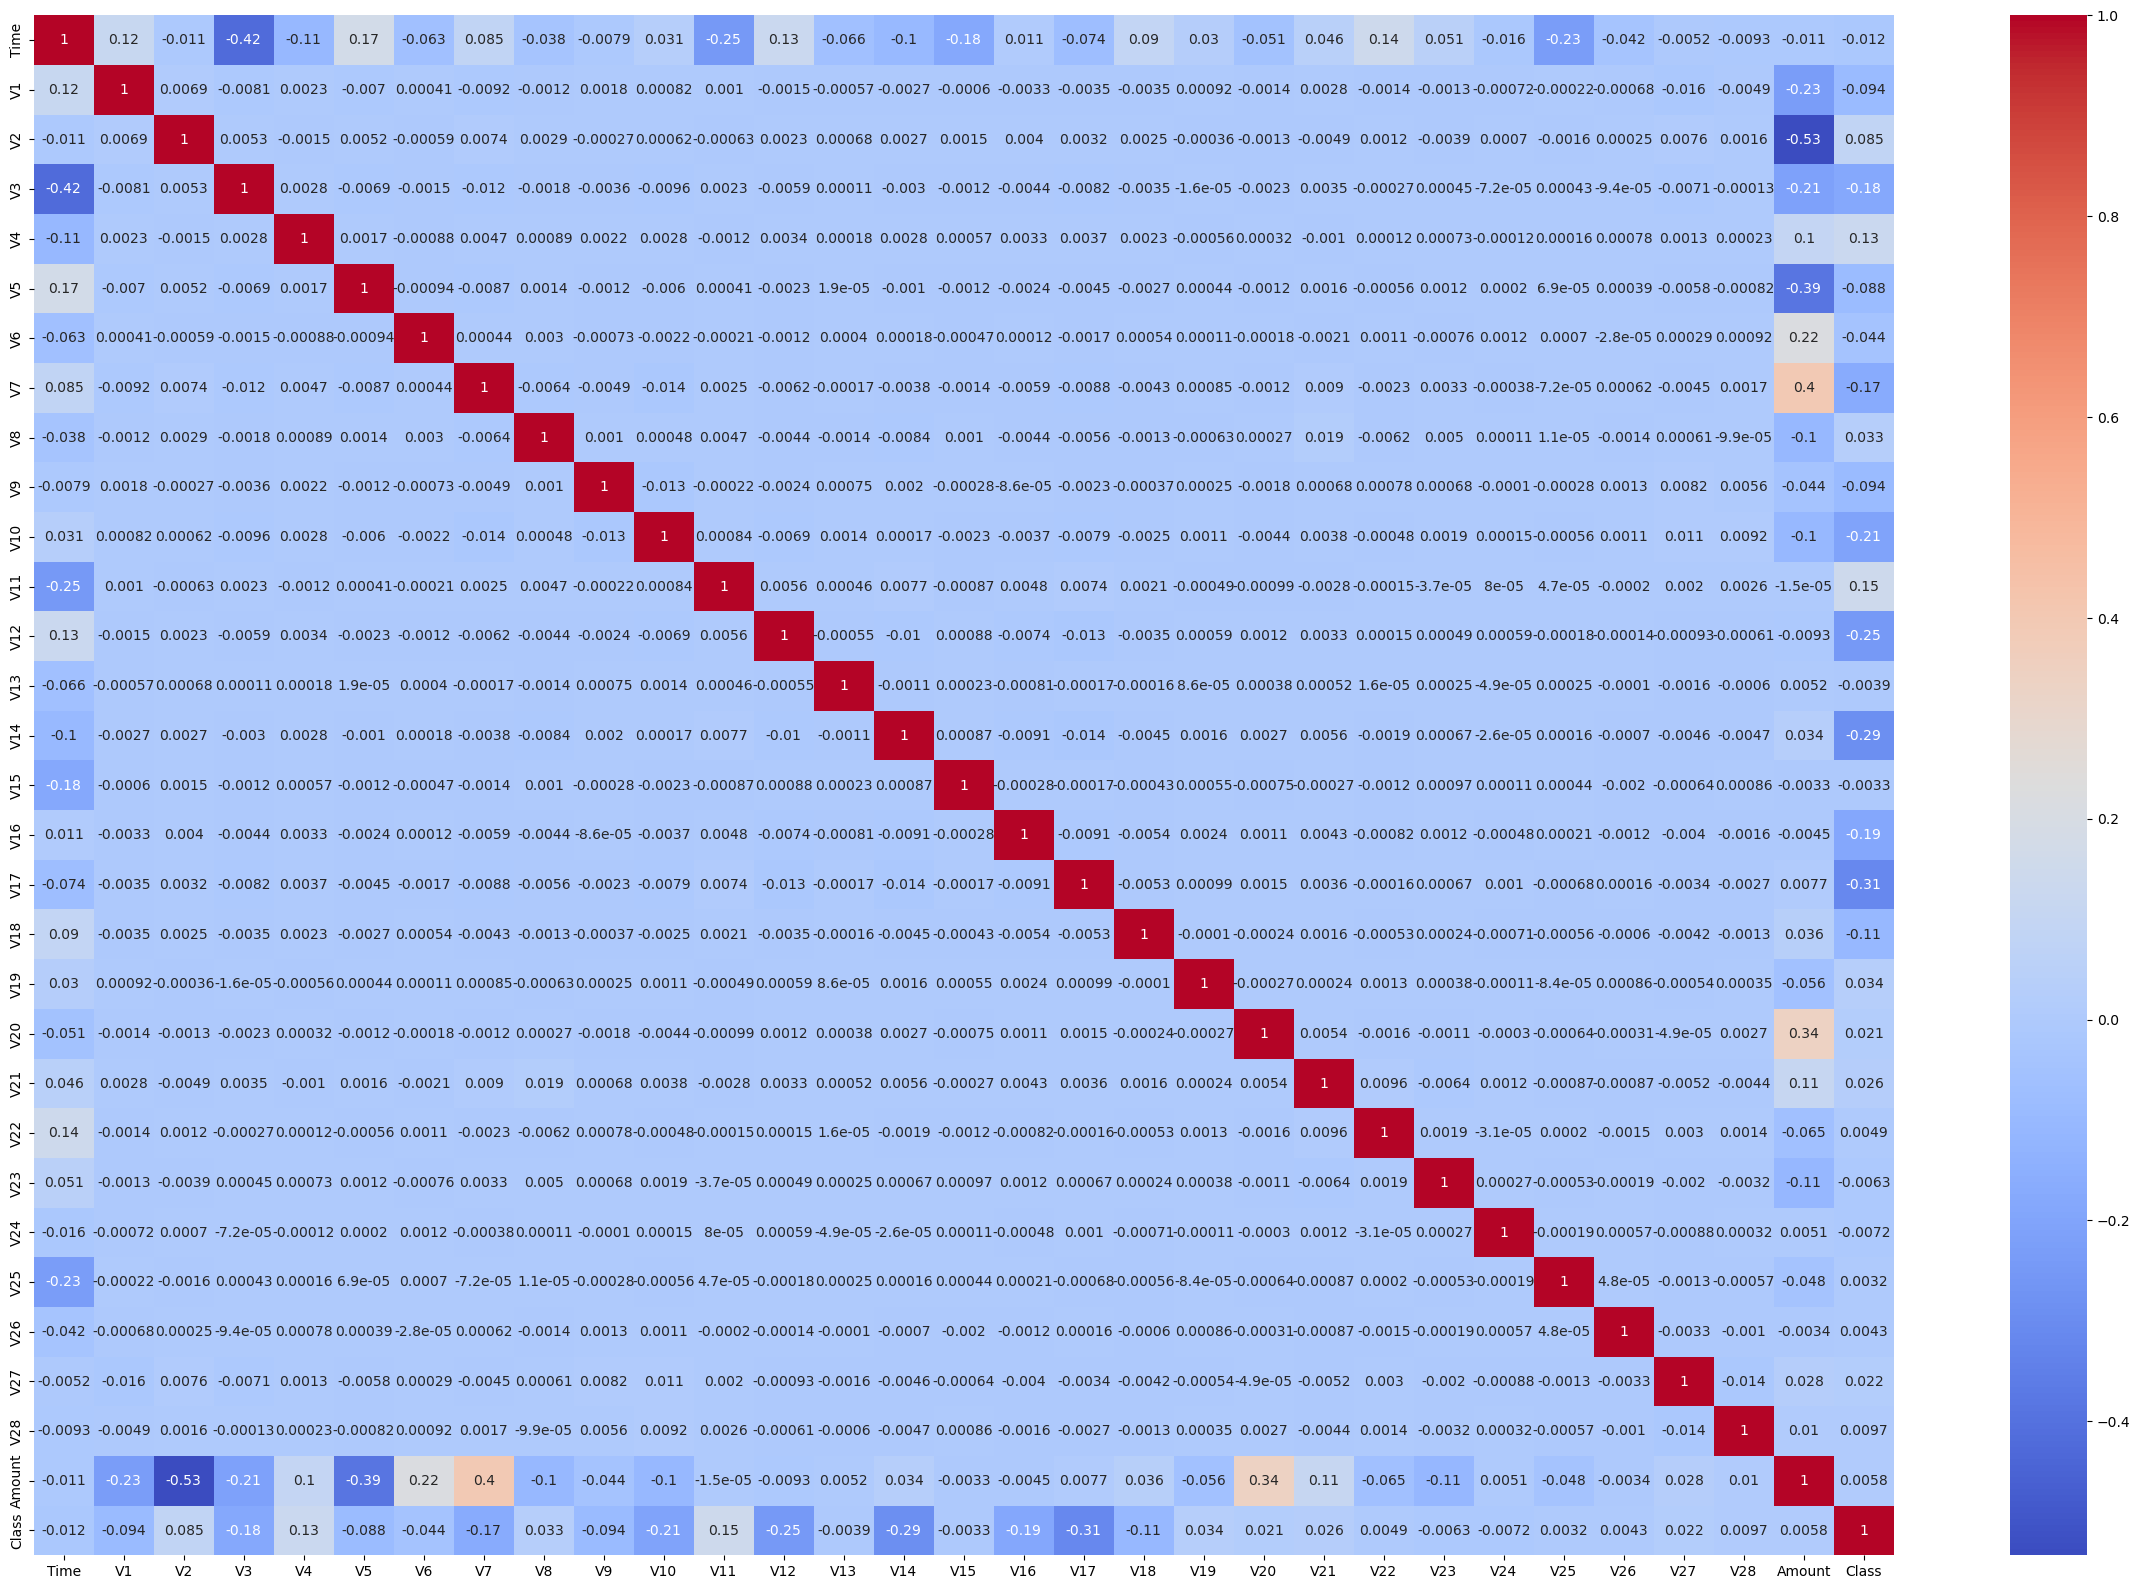

In [128]:
#Checking correlation in heatmap
plt.figure(figsize=(30,20))
corr=dataframe.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True)


#### We observe that most of the data features are not correlated. This is because before publishing, most of the features were presented to a Principal Component Analysis (PCA) algorithm. The features V1 to V28 are most probably the Principal Components resulted after propagating the real features through PCA. We do not know if the numbering of the features reflects the importance of the Principal Components.

In [129]:
# Perform Scaling
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [130]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813


In [131]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## Splitting the data 

In [132]:
# Split the data
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (198608, 29)
Shape of test_X:  (85118, 29)


#### Let's train different models on our dataset and observe which algorithm works better for our problem.

Let's apply Random Forests , Decision Trees,Logistic Regression algorithms to our dataset.

##  Decision Tree Classifier

### Model Building

In [159]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.80582752777255


### Confusion Matrix 

In [161]:

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[84656   224]
 [  106 84966]]


Confusion matrix, without normalization


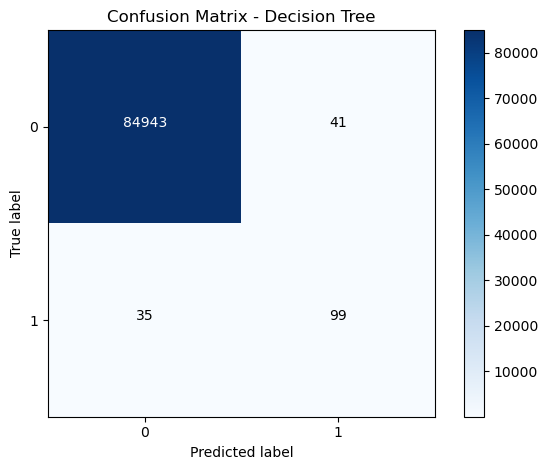

In [160]:

plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

### Scores

In [166]:
print("Evaluation of Descision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Descision Tree Model

Accuracy: 0.99806
Precision: 0.99737
Recall: 0.99875
F1-score: 0.99806


## Random Forest

### Model Building

In [158]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)


Random Forest Score:  99.98352475993222


###  Confusion Matrix

In [162]:
# Plot confusion matrix for Random Forests

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[84852    28]
 [    0 85072]]


Confusion matrix, without normalization


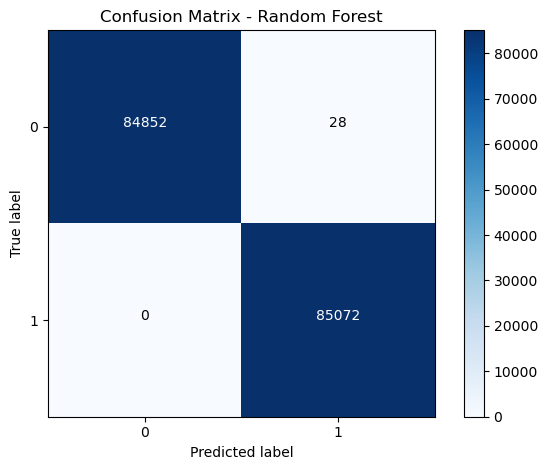

In [163]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

### Scores

In [165]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99984
Precision: 0.99967
Recall: 1.00000
F1-score: 0.99984


## Logistic Regression

### Model Building

In [157]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_X,train_Y)
predictions_lg=log.predict(test_X)
log_score = log.score(test_X, test_Y) * 100

print("Logistic Regression Score:",log_score)

Logistic Regression Score: 94.4437252871399


### Confusion matrix

Confusion Matrix -Logistic regression 
[[84972    12]
 [   60    74]]
Confusion matrix, without normalization


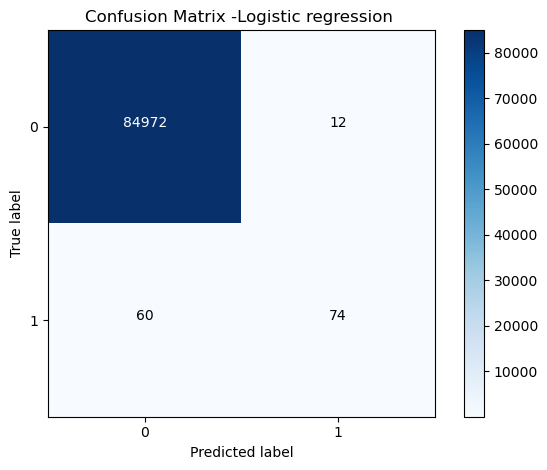

In [137]:
# Plot confusion matrix for Logistic Regression

confusion_matrix_lg = confusion_matrix(test_Y, predictions_lg.round())
print("Confusion Matrix -Logistic regression ")
print(confusion_matrix_lg)
plot_confusion_matrix(confusion_matrix_lg, classes=[0, 1], title= "Confusion Matrix -Logistic regression ")

###  Scores 

In [167]:
print("Evaluation of Logistic Regression")
print()
metrics(test_Y, predictions_lg.round())

Evaluation of Logistic Regression

Accuracy: 0.94444
Precision: 0.97249
Recall: 0.91488
F1-score: 0.94281


In [138]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [145]:
# The below function prints the following necesary metrics

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))
    

### Clearly, Random Forest model works better than Decision Trees and Logistic regression

However, if we look closely, we can see that our dataset has a major **class imbalance** issue. 
More than 99% of transactions are real (avoid fraud), while 0.17% of transactions are fraudulent.


If we train our model with such a distribution without considering the imbalance problems, it predicts the label with a higher value given to actual transactions (since there is more evidence about them) and so achieves more accuracy.

There are several methods that can be used to address the class imbalance issue. One of these is oversampling.
 
Oversampling the minority class is one way to deal with unbalanced datasets. Duplicating examples from the minority class is the simplest method, but these examples don't provide any new insight into the model. 

Instead, fresh examples can be created by synthesising the current ones. The **Synthetic Minority Oversampling Technique**, or **SMOTE** for short, is a technique for data augmentation for the minority class.

### Oversampling on RandomForest


In [148]:
# Performing oversampling on RF

from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (566506, 29)
Resampled shape of Y:  (566506,)
Counter({0: 283253, 1: 283253})


In [149]:
# Build the Random Forest classifier on the new dataset

rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)
predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [150]:
predictions_resampled

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [151]:
# Visualize the confusion matrix

cm_resampled = confusion_matrix(test_Y,predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)

Confusion Matrix - Random Forest
[[84855    25]
 [    0 85072]]


Confusion matrix, without normalization


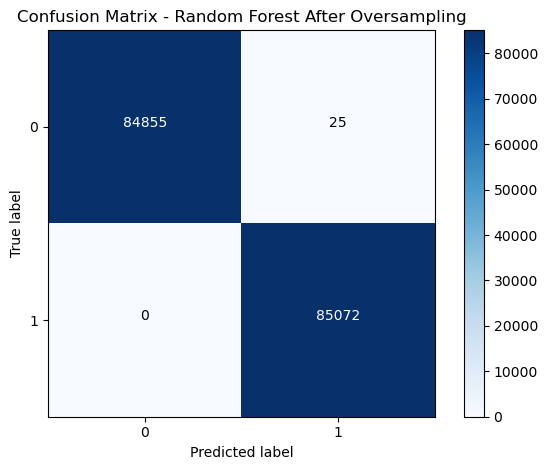

In [152]:
plot_confusion_matrix(cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")

In [153]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99985
Precision: 0.99971
Recall: 1.00000
F1-score: 0.99985


Now it is evident that after addressing the class imbalance problem, our Random forest classifier with SMOTE performs far better than the Random forest classifier withour SMOTE

In [154]:
a=[[1.10321543,-0.040296215,1.267332089,1.28909147,-0.735997164,0.288069163,-0.586056786,0.18937971,0.782332892,-0.267975067,-0.45031128,0.936707715,0.708380406,-0.468647288,0.354574063,-0.246634656,-0.009212378,-0.595912406,-0.575681622,-0.113910177,-0.024612006,0.196001953,0.013801654,0.103758331,0.364297541,-0.382260574,0.092809187,0.037050517,9.99
]]

In [155]:
print(rf_resampled.predict(a))

[0]


C:\Users\annab\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [156]:
import pickle
pickle.dump(rf_resampled,open("model.pkl","wb"))